In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and clean

In [2]:
# Load the data from excel file
data = pd.read_excel('CAPM_data.xlsx', header=2)

data = data.rename(columns={'size:': 'date', 'Small': 'Small-Low','Unnamed: 2': 'Small-High', 'Big': 'Big-Low', 'Unnamed: 4': 'Big-High', 'Unnamed: 5': 'Market'})

data = data[['date', 'Small-Low', 'Small-High', 'Big-Low', 'Big-High', 'Market']]

data.drop(data[0:2].index, inplace=True)

data.reset_index(drop=True, inplace=True)

# 1930-1963

In [3]:
# filter the data from 1930 to 1963
data30_63 = data[:408].copy(deep=True)

# calculate the average return, beta, alpha, and CAPM prediction
agg_df30_63 = pd.DataFrame(columns=['Small-Low', 'Small-High', 'Big-Low', 'Big-High', 'Market'],index=['Average Return', 'beta', 'alpha', 'CAPM Prediction'])

for i in range(5):
    agg_df30_63.iloc[0, i] = data30_63.iloc[:, i+1].mean()
    agg_df30_63.iloc[1, i] = data30_63.iloc[:, [i+1,5]].cov().iloc[0, 1] / data30_63.iloc[:, 5].var()

# calculate the intercept as alpha
agg_df30_63.iloc[2, :] = agg_df30_63.iloc[0, :] - agg_df30_63.iloc[1, :] * agg_df30_63.iloc[0, 4]
agg_df30_63.iloc[3, :] = agg_df30_63.iloc[1, :]*agg_df30_63.iloc[0,4] 

agg_df30_63 = agg_df30_63.astype(float)

# print the result
latex1 = agg_df30_63.to_latex(float_format="%.3f")
latex1 = latex1.replace('toprule', 'hline')
latex1 = latex1.replace('midrule', 'hline')
latex1 = latex1.replace('bottomrule', 'hline')
latex1 = latex1.replace('{llllll}', '{lrrrrr}')
latex1 = latex1.replace('beta', '$\\beta$')
latex1 = latex1.replace('alpha', '$\\alpha$')
print(latex1)

\begin{tabular}{lrrrrr}
\hline
 & Small-Low & Small-High & Big-Low & Big-High & Market \\
\hline
Average Return & 1.129 & 1.449 & 0.778 & 1.213 & 0.822 \\
$\beta$ & 1.256 & 1.531 & 0.927 & 1.442 & 1.000 \\
$\alpha$ & 0.096 & 0.190 & 0.016 & 0.027 & 0.000 \\
CAPM Prediction & 1.033 & 1.259 & 0.762 & 1.185 & 0.822 \\
\hline
\end{tabular}



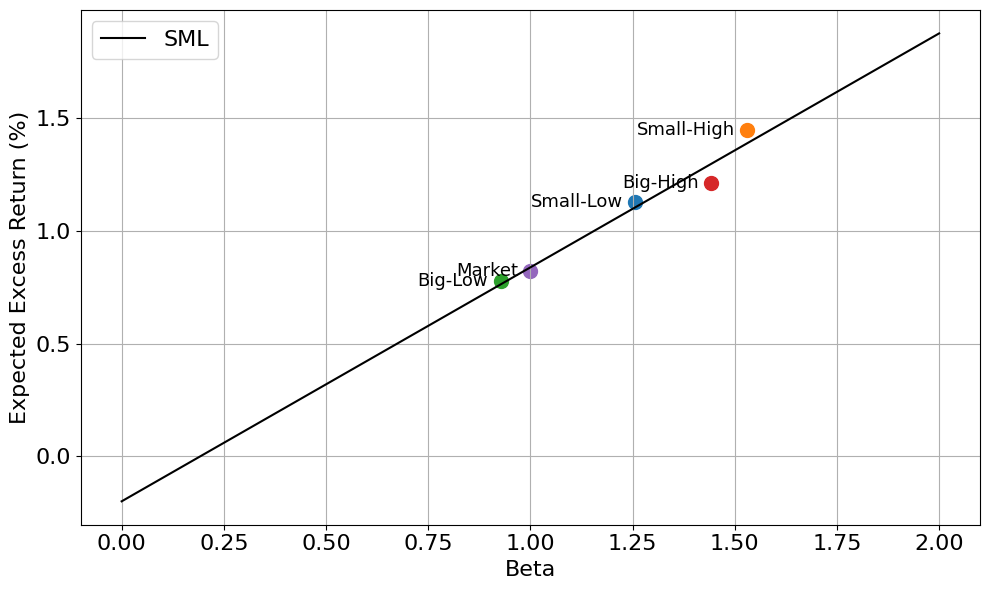

In [4]:
# plot SML
plt.figure(figsize=(10,6))

# Fit a trend line
z = np.polyfit(agg_df30_63.iloc[1, :], agg_df30_63.iloc[0, :], 1)
p = np.poly1d(z)
x = np.linspace(0, 2, 100)

plt.plot(x, p(x), label=f'SML', color='black')

# # Reshape x data to use with np.linalg.lstsq
# x = agg_df30_63.iloc[1, :].values.reshape(-1, 1)
# y = agg_df30_63.iloc[0, :]

# # Perform least squares fit with no intercept
# z, _, _, _ = np.linalg.lstsq(x, y, rcond=None)

# # Create polynomial with fit coefficients
# p_force = np.poly1d(np.append(z, 0))

# plt.plot(x, p_force(x), label=f'SML forced through origin', color='red')

# Plot the data points
for i in range(5):
    plt.scatter(agg_df30_63.iloc[1, i], agg_df30_63.iloc[0, i], s=100)
    plt.text(agg_df30_63.iloc[1, i]-0.03, agg_df30_63.iloc[0, i], agg_df30_63.columns[i], ha='right', va='center', fontsize=13)

plt.xlabel('Beta', fontsize=16)
plt.ylabel('Expected Excess Return (%)', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('SML30_63.png')
plt.show()


# 1964-2004

In [5]:
# filter the data from 1964 to 2004
data64_04 = data[408:].copy(deep=True)

# calculate the average return, beta, alpha, and CAPM prediction
agg_df64_04 = pd.DataFrame(columns=['Small-Low', 'Small-High', 'Big-Low', 'Big-High', 'Market'],index=['Average Return', 'beta', 'alpha', 'CAPM Prediction'])

for i in range(5):
    agg_df64_04.iloc[0, i] = data64_04.iloc[:, i+1].mean()
    agg_df64_04.iloc[1, i] = data64_04.iloc[:, [i+1,5]].cov().iloc[0, 1] / data64_04.iloc[:, 5].var()

# calculate the intercept as alpha
agg_df64_04.iloc[2, :] = agg_df64_04.iloc[0, :] - agg_df64_04.iloc[1, :] * agg_df64_04.iloc[0, 4]
agg_df64_04.iloc[3, :] = agg_df64_04.iloc[1, :]*agg_df64_04.iloc[0,4] 

agg_df64_04 = agg_df64_04.astype(float)

# print the result
latex2 = agg_df64_04.to_latex(float_format="%.3f")
latex2 = latex2.replace('toprule', 'hline')
latex2 = latex2.replace('midrule', 'hline')
latex2 = latex2.replace('bottomrule', 'hline')
latex2 = latex2.replace('{llllll}', '{lrrrrr}')
latex2 = latex2.replace('beta', '$\\beta$')
latex2 = latex2.replace('alpha', '$\\alpha$')
print(latex2)

\begin{tabular}{lrrrrr}
\hline
 & Small-Low & Small-High & Big-Low & Big-High & Market \\
\hline
Average Return & 0.499 & 1.094 & 0.430 & 0.697 & 0.461 \\
$\beta$ & 1.374 & 1.003 & 1.037 & 0.856 & 1.000 \\
$\alpha$ & -0.136 & 0.631 & -0.048 & 0.302 & 0.000 \\
CAPM Prediction & 0.634 & 0.463 & 0.478 & 0.395 & 0.461 \\
\hline
\end{tabular}



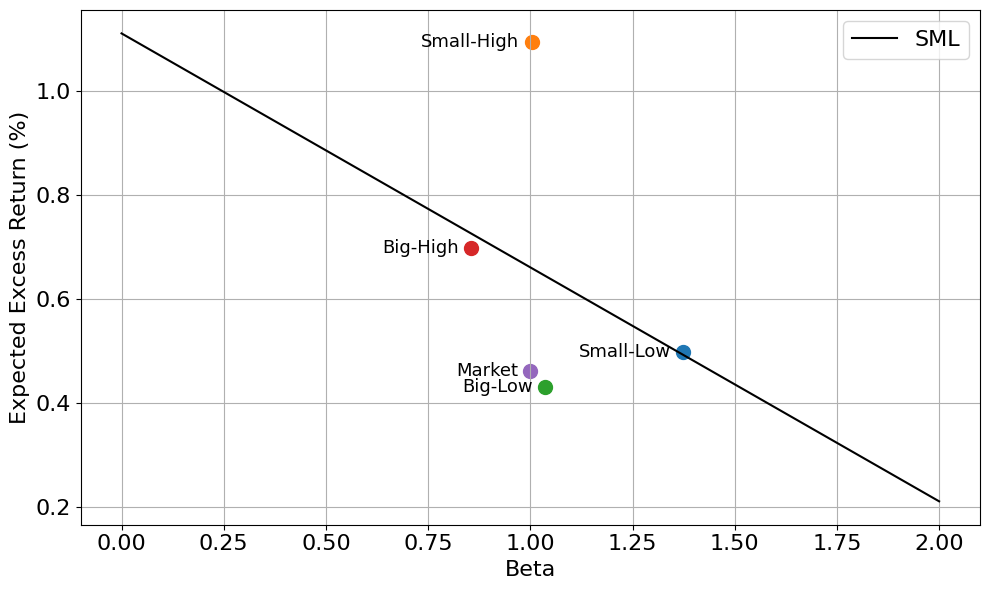

In [6]:
# plot SML
plt.figure(figsize=(10,6))

# Fit a trend line
z = np.polyfit(agg_df64_04.iloc[1, :], agg_df64_04.iloc[0, :], 1)
p = np.poly1d(z)
x = np.linspace(0, 2, 100)
plt.plot(x, p(x), label=f'SML', color='black')

# # Reshape x data to use with np.linalg.lstsq
# x = agg_df64_04.iloc[1, :].values.reshape(-1, 1)
# y = agg_df64_04.iloc[0, :]

# # Perform least squares fit with no intercept
# z, _, _, _ = np.linalg.lstsq(x, y, rcond=None)

# # Create polynomial with fit coefficients
# p_force = np.poly1d(np.append(z, 0))

# plt.plot(x, p_force(x), label=f'SML forced through origin', color='red')

# Plot the data points
for i in range(5):
    plt.scatter(agg_df64_04.iloc[1, i], agg_df64_04.iloc[0, i], s=100)
    plt.text(agg_df64_04.iloc[1, i]-0.03, agg_df64_04.iloc[0, i], agg_df64_04.columns[i], ha='right', va='center', fontsize=13)

plt.xlabel('Beta', fontsize=16)
plt.ylabel('Expected Excess Return (%)', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('SML64_04.png')
plt.show()